In [42]:
import pandas as  pd 
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv("HousingData.csv")

CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to five Boston employment centres

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per 10,000 Dollars

PTRATIO: pupil-teacher ratio by town

B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT: % lower status of the population

MEDV: Median value of owner-occupied homes in $1000's

In [13]:
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
155,3.53501,0.0,19.58,1.0,0.871,6.152,NaN,1.7455,5,403,14.7,88.01,15.02,15.6
312,0.26169,0.0,9.90,0.0,0.544,6.023,90.4,2.8340,4,304,18.4,396.30,11.72,19.4
171,2.31390,0.0,19.58,0.0,0.605,5.880,97.3,2.3887,5,403,14.7,348.13,12.03,19.1
95,0.12204,0.0,2.89,0.0,0.445,6.625,57.8,3.4952,2,276,18.0,357.98,6.65,28.4
158,1.34284,0.0,19.58,0.0,0.605,6.066,100.0,1.7573,5,403,14.7,353.89,6.43,24.3


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [15]:
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [17]:
missing_val_col=['CRIM','ZN','INDUS','CHAS','AGE','LSTAT']
for i in missing_val_col:
    df[i].fillna(df[i].median(),inplace=True)


In [19]:
from sklearn.model_selection import train_test_split

In [21]:
X=df.drop('MEDV',axis=1)
y=df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()

In [24]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model_linear_regressuion=LinearRegression()

In [27]:
model_linear_regressuion.fit(X_train,y_train)

LinearRegression()

In [28]:
predictions_linear=model_linear_regressuion.predict(X_test)

In [32]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [47]:
print(f'The mean squeraed error is {mean_squared_error(y_test,predictions_linear)}')
print(f'The mean absolute error is {mean_absolute_error(y_test,predictions_linear)}')
print(f'The r2_score is {r2_score(y_test,predictions_linear)}')

The mean squeraed error is 33.37026688426961
The mean absolute error is 4.031839436673391
The r2_score is 0.663810055228128


Deep Learning Approach 

In [34]:
import tensorflow as tf

In [37]:
model_nn=tf.keras.Sequential()
model_nn.add(tf.keras.layers.Dense(16,input_dim=13,activation='relu'))
model_nn.add(tf.keras.layers.Dense(8,activation='relu'))
model_nn.add(tf.keras.layers.Dense(1,activation='linear'))


In [38]:
model_nn.compile(loss='mse',optimizer='adam',metrics=['mse','mae'])

In [39]:
train_history = model_nn.fit(X_train, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
9/9 [==============================] - 3s 25ms/step - loss: 548.7551 - mse: 548.7551 - mae: 21.5885 - val_loss: 479.4041 - val_mse: 479.4041 - val_mae: 20.5172
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 540.0808 - mse: 540.0808 - mae: 21.3885 - val_loss: 471.6780 - val_mse: 471.6780 - val_mae: 20.3237
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 530.3765 - mse: 530.3765 - mae: 21.1620 - val_loss: 462.9456 - val_mse: 462.9456 - val_mae: 20.1028
Epoch 4/200
9/9 [==============================] - 0s 4ms/step - loss: 519.3266 - mse: 519.3266 - mae: 20.9072 - val_loss: 453.2029 - val_mse: 453.2029 - val_mae: 19.8511
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 507.3347 - mse: 507.3347 - mae: 20.6236 - val_loss: 442.1960 - val_mse: 442.1960 - val_mae: 19.5596
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 494.4410 - mse: 494.4410 - mae: 20.3028 - val_loss: 429.8181 - val_mse: 4

9/9 [==============================] - 0s 4ms/step - loss: 12.8735 - mse: 12.8735 - mae: 2.6733 - val_loss: 24.6227 - val_mse: 24.6227 - val_mae: 3.2220
Epoch 99/200
9/9 [==============================] - 0s 3ms/step - loss: 12.8066 - mse: 12.8066 - mae: 2.6650 - val_loss: 24.5204 - val_mse: 24.5204 - val_mae: 3.2119
Epoch 100/200
9/9 [==============================] - 0s 3ms/step - loss: 12.6945 - mse: 12.6945 - mae: 2.6514 - val_loss: 24.4105 - val_mse: 24.4105 - val_mae: 3.2018
Epoch 101/200
9/9 [==============================] - 0s 4ms/step - loss: 12.6209 - mse: 12.6209 - mae: 2.6427 - val_loss: 24.3051 - val_mse: 24.3051 - val_mae: 3.1875
Epoch 102/200
9/9 [==============================] - 0s 3ms/step - loss: 12.5498 - mse: 12.5498 - mae: 2.6345 - val_loss: 24.2500 - val_mse: 24.2500 - val_mae: 3.1988
Epoch 103/200
9/9 [==============================] - 0s 4ms/step - loss: 12.4589 - mse: 12.4589 - mae: 2.6252 - val_loss: 24.1171 - val_mse: 24.1171 - val_mae: 3.1774
Epoch 104/200

Epoch 197/200
9/9 [==============================] - 0s 4ms/step - loss: 8.4367 - mse: 8.4367 - mae: 2.1541 - val_loss: 19.5938 - val_mse: 19.5938 - val_mae: 2.8600
Epoch 198/200
9/9 [==============================] - 0s 4ms/step - loss: 8.4360 - mse: 8.4360 - mae: 2.1547 - val_loss: 19.6175 - val_mse: 19.6175 - val_mae: 2.8740
Epoch 199/200
9/9 [==============================] - 0s 4ms/step - loss: 8.4515 - mse: 8.4515 - mae: 2.1584 - val_loss: 19.5909 - val_mse: 19.5909 - val_mae: 2.8834
Epoch 200/200
9/9 [==============================] - 0s 6ms/step - loss: 8.3857 - mse: 8.3857 - mae: 2.1506 - val_loss: 19.5100 - val_mse: 19.5100 - val_mae: 2.8570


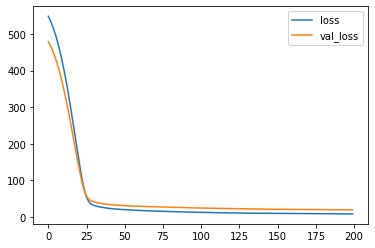

In [43]:
history_df = pd.DataFrame(train_history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

In [44]:
model_nn.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 2ms/step - loss: 21.6747 - mse: 21.6747 - mae: 3.3291


[21.67471694946289, 21.67471694946289, 3.3290693759918213]

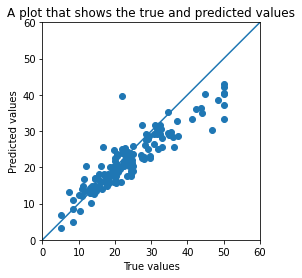

In [46]:
y_pred = model_nn.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('A plot that shows the true and predicted values')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.plot([0, 60], [0, 60])